In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()
# Weight is independent
# Height is dependent

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


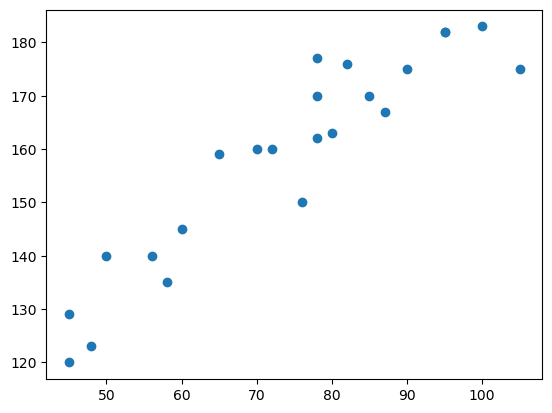

Text(0, 0.5, 'Heights')

In [4]:
# scatter plots
plt.scatter(df['Weight'],df['Height'])
plt.show()
plt.xlabel("Weights")
plt.ylabel("Heights")

In [5]:
# Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [6]:
# Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [7]:
# Independent and dependent features
X = df[['Weight']] #independent features should be dataframe or 2 dimensional array
y = df['Height']

In [8]:
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [9]:
np.array(y).shape

(23,)

In [10]:
# Train Test Split
from sklearn.model_selection import train_test_split


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
X_train.shape

(17, 1)

In [13]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [17]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [18]:
regression = LinearRegression(n_jobs=-1)

In [19]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [20]:
print("Coefficient or slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient or slope:  [17.2982057]
Intercept:  156.47058823529412


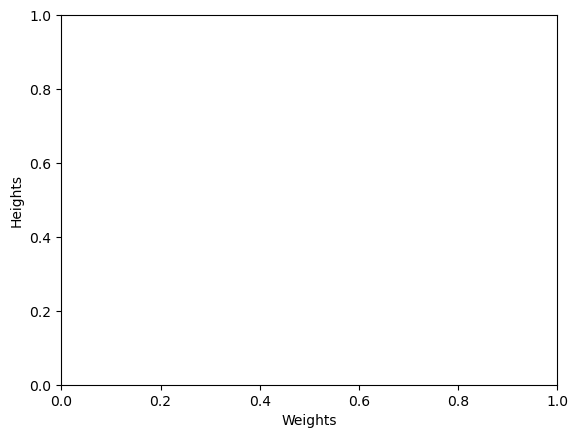

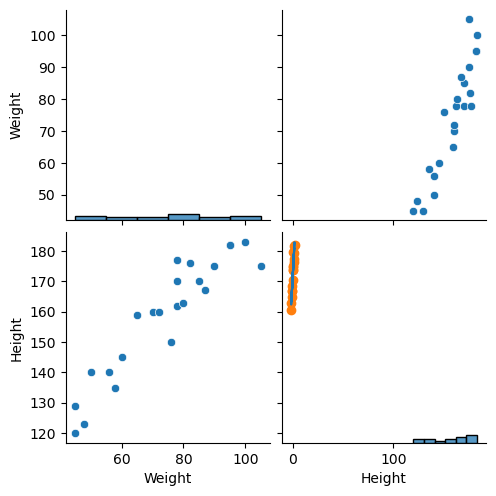

In [21]:
# plot Training Data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))
plt.show()

# Prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 156.470 + 17.29(X_test)

In [22]:
# Prediction for test data
y_pred = regression.predict(X_test)

In [23]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [25]:
# R Square
from sklearn.metrics import r2_score

In [26]:
score = r2_score(y_test,y_pred)
score

0.7360826717981276

In [27]:
# Adjusted R Square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [28]:
# OLS Linear Regression
import statsmodels.api as sm

In [29]:
model = sm.OLS(y_train,X_train).fit()

In [30]:
prediction = model.predict(X_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [31]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 05 Sep 2025   Prob (F-statistic):                       0.664
Time:                        21:09:03   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Shikhaj Somani\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [32]:
# Prediction for new data
regression.predict(scaler.transform([[72]]))

C:\Users\Shikhaj Somani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])